In [2]:
import pandas as pd
import numpy as np
import re
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
df_email = pd.read_csv('output7_new_sentiment.csv',index_col = 0)
from_list = df_email['From'].values.tolist()
for i in range(len(from_list)):
    from_list[i] = eval(from_list[i])
df_email['From'] = from_list

to_list = df_email['To'].values.tolist()
for i in range(len(to_list)):
    to_list[i] = eval(to_list[i])
df_email['To'] = to_list

cc_list = df_email['CC'].values.tolist()
for i in range(len(cc_list)):
    cc_list[i] = eval(cc_list[i])
df_email['CC'] = cc_list

unique_people = set()
for i in range(len(from_list)):
    unique_people.add(from_list[i])

for i in range(len(cc_list)):
    for lst in cc_list[i]:
        unique_people.add(lst)

for i in range(len(to_list)):
    for lst in to_list[i]:
        unique_people.add(lst)
unique_people = list(unique_people)
unique_people.sort()
# name2id, id2name = nameToIndexDict(unique_people)

len(unique_people)



38069

In [45]:
def flatten_list_of_lists(t):
    return [item for sublist in t for item in sublist]

# cra/commisioners and gov are known

In [6]:
# cra and comm

cra_list = [('john', 'dailey', 'john_dailey'),
                ('bryan', 'desloge', 'bryan@deslogemedical.com'),
                ('commissionerbryan', 'desloge', 'commissionerbryan_desloge'),
                ('bryan', 'desloge', 'desloge.bryan@gmail.com'),
                ('bryan', 'desloge', 'deslogeb@leoncountyfl.gov'),
                ('jessica', 'miller', 'jessica.miller@talgov.com'),
                ('jane', 'sauls', 'jane_sauls'),
                ('nick', 'maddox', 'maddox.nicholas@gmail.com'),
                ('nick', 'maddox', 'maddoxn@leoncountyfl.gov'),
                ('mary ann lindley', '', 'lindleym@leoncountyfl.gov'),
                ('maryann', 'lindley', 'maryann_lindley'),
                ('mary', 'lindley', 'mary_lindley'),
                ('kristin', '', 'kristindozier@gmail.com'),
                ('kristen', 'dozier', 'kristen_dozier'),
                ('kristin', 'dozer', 'kristin_dozer'),
                ('kristin', 'dozier', 'dozierk@leoncountyfl.gov'),
                ('bill', 'proctor', 'proctorb@leoncountyfl.gov'),

                ('bryandesloge', '', 'bryandesloge_')
              ]


commissioner_list = [('scoi', 'maddox', 'scoi.maddox@talgov.com'),
                        ('scott', 'maddox', 'maddox@maddoxhorne.com'),
                        ('scott', 'mattox', 'scott@govinc.net'),
                        ('scott', 'maddox', 'scottcharlesmaddox@gmail.com'),
                        ('scott', 'maddox', 'scott@scottmaddox.com'),
                        ('scott', 'maddox', 'shamaddox@embarqmail.com'),
                        ('scott', 'maddox', 'scott.maddox@talgov.com'),
                        ('scof', 'maddox', 'scof.maddox@talgov.com'),
                        ('scos', 'maddox', 'scos.maddox@talgov.com'),
                        ('sha', 'maddox', 'sha_maddox'),
                        ('andrew', 'gillum', 'ademetricg@gmail.com'),
                        ('andrew', 'gillum', 'agillum@pfaw.org'),
                        ('commissionerandrew', 'gillum', 'commissionerandrew_gillum'),
                        ('andrew', 'gilliam', 'andrew_gilliam'),
                        ('andrew', 'gillium', 'andrew_gillium'),
                        ('andrew', 'gillum', 'andrew@andrewgillum.com'),
                        ('andrew', 'gillum', 'gilluma@talgov.com'),
                        ('andrew', 'gillum', 'andrew.gillum@talgov.com'),
                        ('andrew', 'gillams', 'andrew_gillams'),
                        ('mark', 'mustian', 'mmustian@ngnlaw.com'),
                        ('f11332', 'l11332', 'mark@markmustian.com'),
                        ('f11334', 'l11334', 'mark@markmustian.com'),
                        ('mark', 'mustian', 'mmustian@ngn-tally.com'),
                        ('f11333', 'l11333', 'mark@markmustian.com'),
                        ('gil', 'ziffer', 'gil@ziffberry.com'),
                        ('gil', 'ziffer', 'gil.ziffer@talgov.com'),
                        ('curtis', 'richardsom', 'curtis_richardsom'),
                        ('curus', 'richardson', 'curus.richardson@talgov.com'),
                        ('ultis', 'richardson', 'ultis_richardson'),
                        ('curtis', 'richardson', 'cabaide@aol.com'),
                        ('nancy', 'miller', 'jacqueline.hightower@famu.edu'),
                        ('nancy', 'miller', 'nancy.miller@talgov.com'),
                        ('john', 'marks', 'john.marksiii@talgov.com'),
                        ('john', 'marks', 'john.marks@talgov.com'),

                        ('nancymiller', '', 'nancymiller_'),
                         ('gillum,andrew', '', 'gillum,andrew_'),
                         ('gilziffer', '', 'gilziffer_'),
                         ('ziﬀer, gil', ' ', 'ziﬀer, gil_ '),
                         ('ziffer,gil', '', 'ziffer,gil_'),
                         ('marks,john', '', 'marks,john_'),
                         ('johnmarks', '', 'marksj@talgov.com'),
                         ('maddox,scott', '', 'maddox,scott_'),
                         ('f4395', 'l4395', 'scott@scottmaddox2012.com'),
                         ('curtisrichardson', '', 'curtisrichardson_'),
                         ('curts richardson@talgov.com', ' ', 'curts richardson@talgov.com_ '),
                         ('f15045', 'l15045', 'curts.richardson@talgov.com'),
                         ('miller,nancy', '', 'miller,nancy_'),

                        ]
cra_comm_list = cra_list + commissioner_list

In [7]:
cra_comm_idx_list = []
for i,people in enumerate(unique_people):
    if people in cra_comm_list:
        cra_comm_idx_list.append(i)

In [8]:
# gov
df_org=pd.read_excel('emails-combine 06162020.xlsx',sheet_name=0,usecols=[1,2,3,15,19,23])
gorvenment_people_list = []
for i in range(len(df_org)):
    row = df_org.iloc[i]
    if pd.isnull(row['First']):
        continue
    first = str(row['First']).lower().strip()
    last = str(row['Last']).lower().strip()
    if pd.isnull(row['Email']):
        email = first + '_' + last
    else:
        email = row['Email'].lower().strip()
    if row['Organization1'] is not np.nan:
        if 'Tallahassee' in row['Organization1'] or 'Leon County' in row['Organization1']:
            gorvenment_people_list.append( (first, last, email) )
            continue
    if row['Organization 2'] is not np.nan:
        if 'Tallahassee' in row['Organization 2'] or 'Leon County' in row['Organization 2']:
            gorvenment_people_list.append( (first, last, email) )
            continue
    if row['Organization 3'] is not np.nan:
        if 'Tallahassee' in row['Organization 3'] or 'Leon County' in row['Organization 3']:
            gorvenment_people_list.append( (first, last, email) )
            continue

In [134]:
len(gorvenment_people_list)

130

In [57]:
def is_person_in_org(target_person, org_people_list = None, org_extensions = None):
    """
    Check if the person is in an org
    
    :param target_person: A tuple of (firstname, lastname, emailaddress)
    :type target_person: tuple(str, str, str)
    :param org_people_list: List of known people in the org. None by default.
    :type org_people_list: None or list(tuple(str, str, str)), optional
    :param org_extensions: Known email extensions for the org. None by default.
    :type org_extensions: None or list(str), optional
    
    :return: Whether the person is in the org or not
    :rtype: bool
    
    :raises ValueError: if both org_people_list and org_extensions are not given
    """
    if not org_extensions and not org_people_list:
        raise ValueError('both org_people_list and org_extensions are not given')
    
    if org_extensions:
        for org_ext in org_extensions:
            if org_ext in target_person[2]:
                return True
    if org_people_list:
        for org_person in org_people_list:
            if target_person[2] == org_person[2] or (target_person[0] == org_person[0] and target_person[1] == org_person[1]):
                return True
    return False

In [58]:
gov_extensions = ['talgov.com', 'leoncountyfl.gov', 'tallahassee.com']

In [10]:
re_extension = re.compile('\@([0-9a-z\.ﬂﬁﬀ]+)') # ﬂ ﬁ ﬀ are three special characters that comes from OCR a pdf
re_email = re.compile('([0-9a-z\.\_ﬂﬁﬀ]+\@[0-9a-z\.ﬂﬁﬀ]+)')

In [38]:
seperate_cra_gov = True
sort_email_by_frequency = True

In [42]:
extension_dic = {}
if seperate_cra_gov:
    extension_dic['gov'] = defaultdict(int)
    extension_dic['cra_comm'] = defaultdict(int)

for i,people in enumerate(unique_people):
    if seperate_cra_gov and (i in government_idx_list or i in cra_comm_idx_list):
        if '@' in people[2]:
            email = re_email.findall(people[2].strip(' _').replace(' ', ''))[0]
            if i in government_idx_list:
                extension_dic['gov'][email] += 1
            else:
                extension_dic['cra_comm'][email] += 1
        continue
    if '@' in people[2]:
        if people[2].count('@') == 1:
            try:
                email = re_email.findall(people[2].strip(' _').replace(' ', ''))[0]
                extension = re_extension.findall(people[2].strip(' _').replace(' ', ''))[0]
                if extension not in extension_dic:
                    extension_dic[extension] = defaultdict(int)

                extension_dic[extension][email] += 1
            except:
                print('email address not follow standard form, might be OCR error:', people[2])
if sort_email_by_frequency:
    for extension in extension_dic.keys():
        extension_dic[extension] = sorted(extension_dic[extension].items(), key = lambda x:x[1], reverse = True)
else:
    for extension in extension_dic.keys():
        extension_dic[extension] = extension_dic[extension].items()


email address not follow standard form, might be OCR error: marc@_
email address not follow standard form, might be OCR error: mw@_
email address not follow standard form, might be OCR error: nancy.miller@_
email address not follow standard form, might be OCR error: paresh.master@_
email address not follow standard form, might be OCR error: rdaws@_
email address not follow standard form, might be OCR error: tflanigan@_


In [84]:
def get_extension_dic(people_list, orgs_names = None, orgs_people = None, orgs_extensions = None, sort_email_by_frequency = True):
    """
    Group emails by their extensions. Occurance of each email address is also recorded.
    
    Notice: The length of orgs_names, orgs_people_list, and orgs_extensions must be the same. 
    Therefore, if for one org, people are known but not the extensions. And vise versa for another
    org, the list must be filled with empty list to compensate the length 
    
    :param people_list: A list of people tuples (firstname, lastname, emailaddress)
    :type people_list: tuple(str, str, str)
    :param orgs_names: list of all known org names. None by default.
    :type seperate_special_org: None or list(str), optional
    :param orgs_people: list of known people in all known orgs. None by default.
    :type seperate_special_org: None or list(list(tuple(str, str, str))), optional
    :param orgs_extensions: list of known email extensions in all known orgs. None by default.
    :type seperate_special_org: None or list(list(str)), optional
    :param sort_email_by_frequency: Option to sort emails by frequency. True by default.
    :type: bool, optional
    
    :return: The extension dictionary. Dictionary keys are all appeared email extensions. 
             Dictionary values are lists of tuples (email, #occurance)
    :rtype: dict(list(tuple(str, int))) 
    
    :raises AssertionError: if length of orgs_names and orgs_people_list don't match
    :raises AssertionError: if length of orgs_names and orgs_extensions don't match
    
    """
    # check the length, make sure there won't be an error later
    if orgs_people:
        assert len(orgs_names) == len(orgs_people), 'length of orgs_people_list must be the same as length of orgs_names'
    if orgs_extensions:
        assert len(orgs_names) == len(orgs_extensions), 'length of orgs_extensions must be the same as length of orgs_names'    
    
    from collections import defaultdict
    
    # some initializations
    extension_dic = defaultdict(lambda: defaultdict(int))
    if orgs_names:
        num_orgs = len(orgs_names)
        if not orgs_people:
            orgs_people = [[] for i in range(num_orgs)]
        if not orgs_extensions:
            orgs_extensions = [[] for i in range(num_orgs)]
        for org_name in orgs_names:
            extension_dic[org_name] = defaultdict(int)
    
    # go through the people list can category each person into an extension
    for person in people_list:
        found = 0
        if orgs_names:
            for idx_org in range(num_orgs):
                if is_person_in_org(person, orgs_people[idx_org], orgs_extensions[idx_org]) and '@' in person[2]:
                    email = re_email.findall(person[2].strip(' _').replace(' ', ''))[0]
                    extension_dic[orgs_names[idx_org]][email] += 1
                    found = 1
                    break
        if found == 0 and '@' in person[2]:
            if person[2].count('@') == 1:
                try:
                    email = re_email.findall(person[2].strip(' _').replace(' ', ''))[0]
                    extension = re_extension.findall(person[2].strip(' _').replace(' ', ''))[0]
                    extension_dic[extension][email] += 1
                except:
                    print('email address not follow standard form, might be OCR error:', person[2])
    
    if sort_email_by_frequency:
        for extension in extension_dic.keys():
            extension_dic[extension] = sorted(extension_dic[extension].items(), key = lambda x:x[1], reverse = True)
    else: # if not sort, convert dictionary count to tuple count (emailaddress, count)
        for extension in extension_dic.keys():
            extension_dic[extension] = extension_dic[extension].items()
            
    return extension_dic


In [85]:
all_people_list = from_list + flatten_list_of_lists(to_list) + flatten_list_of_lists(cc_list)

# cra must be put before gov, because cra people also use talgov emails.
orgs_names = ['cra_comm', 'gov']
orgs_people = [cra_comm_list, gorvenment_people_list] 
orgs_extensions = [[], gov_extensions]

In [111]:
extension_dic = get_extension_dic(all_people_list, orgs_names = orgs_names, orgs_people = orgs_people, orgs_extensions = orgs_extensions)


email address not follow standard form, might be OCR error: marc@_
email address not follow standard form, might be OCR error: rdaws@_
email address not follow standard form, might be OCR error: tflanigan@_
email address not follow standard form, might be OCR error: nancy.miller@_
email address not follow standard form, might be OCR error: mw@_
email address not follow standard form, might be OCR error: paresh.master@_


# combine extensions with more than 1 dot

In [121]:
dic_keys = list(extension_dic.keys())
for extension in dic_keys:
    if extension.count('.') > 1:
        new_extension = '.'.join(extension.split('.')[-2:])
        if new_extension not in extension_dic:
            extension_dic[new_extension] = []
        extension_dic[new_extension] += extension_dic[extension]
        del extension_dic[extension]

# save into excel

In [123]:
# sort by num of unique email addresses
sorted_extension_groups = sorted(extension_dic.items(), key = lambda x:len(x[1]), reverse=True)
# get list for saving and plotting
extensions = []
lengths = []
for g in sorted_extension_groups:
    extensions.append(g[0])
    lengths.append(len(g[1]))


In [148]:
# left join on the index column
df_out = pd.DataFrame()
df_out['index'] = np.arange(lengths[0])
df_out[extensions[0]] = extension_dic[extensions[0]]
for i in range(1, 200):
    df_temp = pd.DataFrame()
    df_temp['index'] = np.arange(lengths[i])
    df_temp[extensions[i]] = extension_dic[extensions[i]]
    df_out = df_out.merge(df_temp, how ='left')
df_out = df_out.fillna('')

In [147]:
df_out

,index,gmail.com,gov,yahoo.com,comcast.net,aol.com,fsu.edu,hotmail.com,embarqmail.com,fl.us,...,verizon.net,fmbbank.com,pacecenter.org,americanaudiovisual.com,neighborhoodmedicalcenter.org,bbbsbigbend.org,fightinghunger.org,workforceflorida.com,theoasiscenter.net,icma.org
0,0,"(paigecartersmith@gmail.com, 398)","(amerzerfleming@yahoo.com, 1936)","(pascalededouard@yahoo.com, 103)","(doropallo@comcast.net, 92)","(jeaniemak@aol.com, 116)","(cheacox@fsu.edu, 105)","(deanminardi@hotmail.com, 83)","(lharvey2110c@embarqmail.com, 86)","(patricia.sanzone@dep.state.fl.us, 12)",...,"(susanglickman@verizon.net, 3)","(idonkin@fmbbank.com, 30)","(kelly.otte@pacecenter.org, 11)","(jazzarito@americanaudiovisual.com, 2)","(pgray@neighborhoodmedicalcenter.org, 10)","(ceo@bbbsbigbend.org, 7)","(ygarcia@fightinghunger.org, 6)","(chart@workforceflorida.com, 5)","(haley.cutler@theoasiscenter.net, 3)","(bpayne@icma.org, 1)"
1,1,"(scottmaddox2012@gmail.com, 170)","(allison.fleming@talgov.com, 1738)","(volunteerbrehon@yahoo.com, 70)","(vyoung26@comcast.net, 89)","(steeva8@aol.com, 100)","(dcoburn@fsu.edu, 82)","(classactionwakulla@hotmail.com, 63)","(betheltowers@embarqmail.com, 60)","(david.worley@dep.state.fl.us, 8)",...,"(dlbowden@verizon.net, 2)","(dmay@fmbbank.com, 7)","(lashawn.gordon@pacecenter.org, 7)","(ddamron@americanaudiovisual.com, 2)","(ojones@neighborhoodmedicalcenter.org, 8)","(kristie.teal@bbbsbigbend.org, 6)","(cphoenix@fightinghunger.org, 5)","(dmccall@workforceflorida.com, 3)","(intern@theoasiscenter.net, 1)","(bsherman@icma.org, 1)"
2,2,"(chuchabarber@gmail.com, 165)","(mark.beaudoin@talgov.com, 1440)","(byronburroughs@yahoo.com, 65)","(jrfsu@comcast.net, 76)","(marycfrederick@aol.com, 91)","(ebarron@fsu.edu, 69)","(rev.walker@hotmail.com, 47)","(mamenzel@embarqmail.com, 49)","(doug.alderson@dep.state.fl.us, 4)",...,"(riciareilly@verizon.net, 1)","(slester@fmbbank.com, 4)","(kelly.parker@pacecenter.org, 6)","(jennifer@americanaudiovisual.com, 2)","(jfreeman@neighborhoodmedicalcenter.org, 3)","(jeanie@bbbsbigbend.org, 4)","(spiotrowski@fightinghunger.org, 3)","(pdransfield@workforceflorida.com, 3)","(kristin.shelton@theoasiscenter.net, 1)","(cmazique@icma.org, 1)"
3,3,"(jgvanpelt1@gmail.com, 132)","(wayne.tedder@talgov.com, 1425)","(dodidelle@yahoo.com, 64)","(abarnes37@comcast.net, 66)","(mmiaisha@aol.com, 79)","(jad08d@fsu.edu, 64)","(cpewing@hotmail.com, 34)","(jcedc@embarqmail.com, 42)","(thomas.frick@dep.state.fl.us, 3)",...,"(brownmjdm@verizon.net, 1)","(dwhitaker@fmbbank.com, 4)","(marcella.torres@pacecenter.org, 6)","(david@americanaudiovisual.com, 1)","(jwillis@neighborhoodmedicalcenter.org, 2)","(alva@bbbsbigbend.org, 2)","(croteau@fightinghunger.org, 1)","(jbarber@workforceflorida.com, 2)","(kyndra.light@theoasiscenter.net, 1)","(customerservices@icma.org, 1)"
4,4,"(adambcorey@gmail.com, 113)","(richard.mccraw@talgov.com, 1152)","(amy4hand@yahoo.com, 64)","(kimayda@comcast.net, 66)","(alan1596@aol.com, 73)","(kkelling@fsu.edu, 60)","(wesleymhall@hotmail.com, 30)","(kwdix@embarqmail.com, 27)","(richard.w.hicks@dep.state.fl.us, 3)",...,"(gm.af@verizon.net, 1)","(rmcneill@fmbbank.com, 2)","(amber.proctor@pacecenter.org, 5)","(jdamron@americanaudiovisual.com, 1)","(sfoster@neighborhoodmedicalcenter.org, 2)","(tanesha.mcdonald@bbbsbigbend.org, 1)","(rickminor@fightinghunger.org, 1)","(vhelle@workforceflorida.com, 2)","(reilly.clemens@theoasiscenter.net, 1)","(rford@icma.org, 1)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,1830,"(a4nsly@gmail.com, 1)",,,,,,,,,...,,,,,,,,,,
1831,1831,"(kaneabass@gmail.com, 1)",,,,,,,,,...,,,,,,,,,,
1832,1832,"(sculpturesbyjohnbirch@gmail.com, 1)",,,,,,,,,...,,,,,,,,,,
1833,1833,"(robertlotane1@gmail.com, 1)",,,,,,,,,...,,,,,,,,,,


In [149]:
df_out.to_csv('top 200 email extensions.csv')

# plot

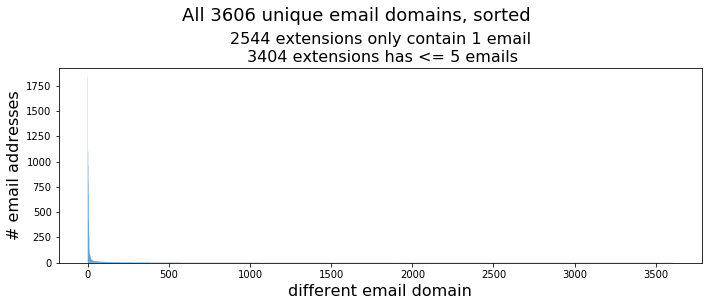

In [168]:
x = np.arange(len(extensions))
plt.figure(figsize = (10,4))
plt.bar(x, lengths, width=1, snap=False)
plt.suptitle(f'All {len(extensions)} unique email domains, sorted', fontsize = 18, y = 1.05)
plt.title(f'{sum(np.array(lengths) == 1)} extensions only contain 1 email\n {sum(np.array(lengths) <= 5)} extensions has <= 5 emails', fontsize = 16)
plt.xlabel('different email domain', fontsize = 16)
plt.ylabel('# email addresses', fontsize = 16)
plt.tight_layout()
plt.show()

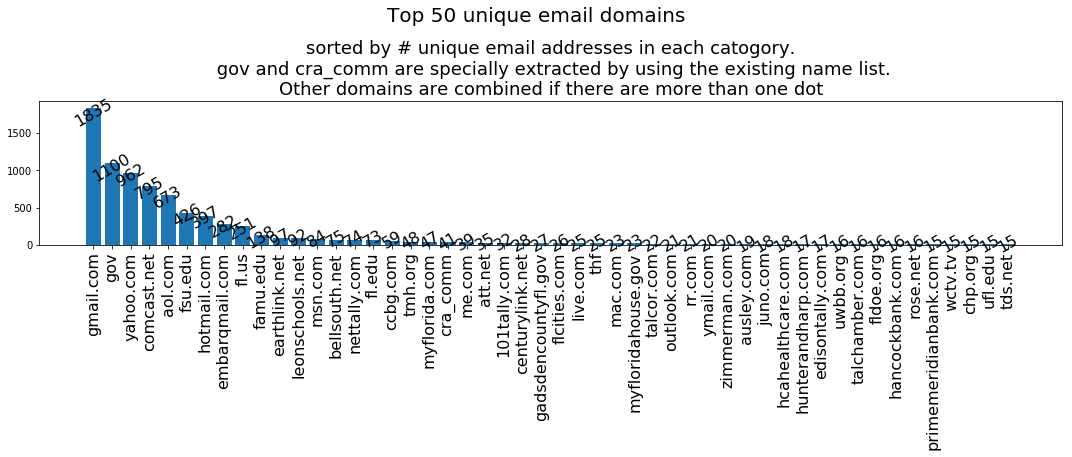

In [169]:
top_n = 50
x = np.arange(top_n)
plt.figure(figsize = (15,6))
plt.bar(x,lengths[:top_n])
plt.xticks(x, extensions[:top_n], rotation = 90, fontsize = 16)
for i in range(top_n):
    plt.annotate(lengths[i], (x[i],lengths[i]), ha='center', fontsize = 16, rotation = 30)
plt.suptitle(f'Top {top_n} unique email domains', fontsize = 20,y = 1.05)
plt.title(f'sorted by # unique email addresses in each catogory.\n gov and cra_comm are specially extracted by using the existing name list.\nOther domains are combined if there are more than one dot', fontsize = 18)
plt.tight_layout()
plt.show()